In [2]:
#General imports
import Degeneration as DegGen
import matplotlib.pyplot as plt
import ImageHelper as ImgHelper
from scipy import misc as scipyMisc
import LabelDictionary as Labels

import Training as Training
import Scorer
import numpy as np

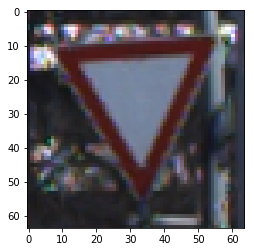

In [15]:
#Load resource - resource folder with ppm images is needed in Medusa folder
img = ImgHelper.load_ppm_image("images/12620.ppm")
plt.imshow(img)
plt.show()

In [4]:
# Load model - Trained model is needed in Medusa folder
aphrodite = Training.load_model('Aphrodite.h5')
# aphrodite.summary()

In [16]:
# Predict our image local:
prediction = aphrodite.predict(np.expand_dims(img,0))[0]

bestClass = prediction.argmax()
bestScore = prediction[bestClass]

print("Aphrodite predicts the image belongs to class: ", bestClass , ":", Labels.GTSRB_INT_TO_LABEL[bestClass], " with Score", bestScore)

Aphrodite predicts the image belongs to class:  13 : give_way  with Score 1.0


StartConfidence: 1.0


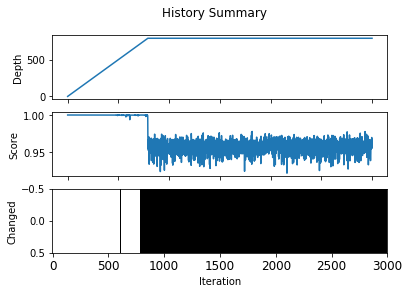

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


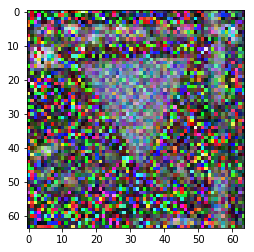

In [18]:
#Local Degeneration
alternation=DegGen.chain([DegGen._softNoise,DegGen._softNoise,DegGen._noise,DegGen._normalize])

ans = DegGen.degenerate(aphrodite, img, bestClass, alternation, decay=0.004, iterations=1000, maxloops=3000,verbose=False,history=True)
#scipyMisc.imsave("images/localDegenerated.png",ans[1])
plt.imshow(ans[1])

In [ ]:
# Predict our image local:
degPrediction = aphrodite.predict(np.expand_dims(ans[1],0))[0]

degClass = degPrediction.argmax()
degScore = degPrediction[bestClass]

print("Aphrodite predicts the image belongs to class: ", degClass , ":", Labels.GTSRB_INT_TO_LABEL[degClass], " with Score", degScore)

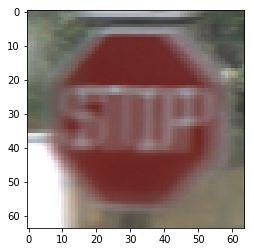

In [19]:
#Load resource - resource folder with ppm images is needed in Medusa folder
remoteImg =ImgHelper.load_ppm_image("images/TestStop.ppm")
plt.imshow(remoteImg)


In [20]:
#Remote Degeneration
remoteAlternation = DegGen.chain([DegGen._normalize,DegGen._noise,DegGen._smooth,DegGen._softNoise])

print(Scorer.send_ppm_image(remoteImg))
deg = remoteAlternation(remoteImg)
print(Scorer.send_ppm_image(deg))

<Response [200]>
<Response [200]>


In [21]:

remoteAns = DegGen.remoteDegenerate(remoteImg, remoteAlternation,verbose=True, iterations=25, maxloops=600,decay=0.01)

#scipyMisc.imsave("resources/remoteDegenerated.png",ans[1])
plt.imshow(remoteAns[1])

StartConfidence: 0.97586221
Score: 0.26376906 Depth: 0 Loop: 1
Score: 0.26634747 Depth: 0 Loop: 2
Score: 0.24931823 Depth: 0 Loop: 3
Score: 0.27497169 Depth: 0 Loop: 4
Score: 0.27523598 Depth: 0 Loop: 5
Score: 0.26546842 Depth: 0 Loop: 6
Score: 0.27000085 Depth: 0 Loop: 7
Score: 0.27044395 Depth: 0 Loop: 8
Score: 0.25909156 Depth: 0 Loop: 9


KeyboardInterrupt: 

StartConfidence: 0.97586221
Score: 0.9603194 Depth: 0 Loop: 1
Score: 0.93951511 Depth: 1 Loop: 2
Score: 0.94068414 Depth: 1 Loop: 3
Score: 0.91635782 Depth: 2 Loop: 4
Score: 0.91578931 Depth: 2 Loop: 5
Score: 0.91510868 Depth: 2 Loop: 6
Score: 0.9158445 Depth: 2 Loop: 7
Score: 0.91543603 Depth: 2 Loop: 8
Score: 0.91438907 Depth: 2 Loop: 9
Score: 0.91351604 Depth: 2 Loop: 10
Score: 0.915609 Depth: 2 Loop: 11
Score: 0.91573012 Depth: 2 Loop: 12
Score: 0.91486335 Depth: 2 Loop: 13
Score: 0.91609591 Depth: 2 Loop: 14
Score: 0.91577041 Depth: 2 Loop: 15
Score: 0.91658008 Depth: 2 Loop: 16
Score: 0.91599017 Depth: 2 Loop: 17
Score: 0.91380185 Depth: 2 Loop: 18
Score: 0.91497141 Depth: 2 Loop: 19
Score: 0.91639447 Depth: 2 Loop: 20
Score: 0.91592318 Depth: 2 Loop: 21
Score: 0.91547519 Depth: 2 Loop: 22
Score: 0.91486436 Depth: 2 Loop: 23
Score: 0.91772014 Depth: 2 Loop: 24
Score: 0.915604 Depth: 2 Loop: 25
Score: 0.91489255 Depth: 2 Loop: 26
Score: 0.91514093 Depth: 2 Loop: 27
Score: 0.913723

Score: 0.91615295 Depth: 2 Loop: 226
Score: 0.91614556 Depth: 2 Loop: 227
Score: 0.91808635 Depth: 2 Loop: 228
Score: 0.91512263 Depth: 2 Loop: 229
Score: 0.91711533 Depth: 2 Loop: 230
Score: 0.91456085 Depth: 2 Loop: 231
Score: 0.91574651 Depth: 2 Loop: 232
Score: 0.91230905 Depth: 2 Loop: 233
Score: 0.91500157 Depth: 2 Loop: 234
Score: 0.91475892 Depth: 2 Loop: 235
Score: 0.91406721 Depth: 2 Loop: 236
Score: 0.91390842 Depth: 2 Loop: 237
Score: 0.91386038 Depth: 2 Loop: 238
Score: 0.91516215 Depth: 2 Loop: 239
Score: 0.91390902 Depth: 2 Loop: 240
Score: 0.91610336 Depth: 2 Loop: 241
Score: 0.91590858 Depth: 2 Loop: 242
Score: 0.91511005 Depth: 2 Loop: 243
Score: 0.91521448 Depth: 2 Loop: 244
Score: 0.91294134 Depth: 2 Loop: 245
Score: 0.91759747 Depth: 2 Loop: 246
Score: 0.91490394 Depth: 2 Loop: 247
Score: 0.91482383 Depth: 2 Loop: 248
Score: 0.91529 Depth: 2 Loop: 249
Score: 0.91419047 Depth: 2 Loop: 250
Score: 0.91537601 Depth: 2 Loop: 251
Score: 0.91618359 Depth: 2 Loop: 252
Scor

Score: 0.88916713 Depth: 3 Loop: 449
Score: 0.88922632 Depth: 3 Loop: 450
Score: 0.88856113 Depth: 3 Loop: 451
Score: 0.8863678 Depth: 3 Loop: 452
Score: 0.88715476 Depth: 3 Loop: 453
Score: 0.88786501 Depth: 3 Loop: 454
Score: 0.88858098 Depth: 3 Loop: 455
Score: 0.88998812 Depth: 3 Loop: 456
Score: 0.88861328 Depth: 3 Loop: 457
Score: 0.88960457 Depth: 3 Loop: 458
Score: 0.88716787 Depth: 3 Loop: 459
Score: 0.88730472 Depth: 3 Loop: 460
Score: 0.88901746 Depth: 3 Loop: 461
Score: 0.8865937 Depth: 3 Loop: 462
Score: 0.8877176 Depth: 3 Loop: 463
Score: 0.88646287 Depth: 3 Loop: 464
Score: 0.88638842 Depth: 3 Loop: 465
Score: 0.88764918 Depth: 3 Loop: 466
Score: 0.88350576 Depth: 3 Loop: 467
Score: 0.88878679 Depth: 3 Loop: 468
Score: 0.88683623 Depth: 3 Loop: 469
Score: 0.88906336 Depth: 3 Loop: 470
Score: 0.88956416 Depth: 3 Loop: 471
Score: 0.88695526 Depth: 3 Loop: 472
Score: 0.89040095 Depth: 3 Loop: 473
Score: 0.88699991 Depth: 3 Loop: 474
Score: 0.88829589 Depth: 3 Loop: 475
Scor

Score: 0.88693994 Depth: 3 Loop: 671
Score: 0.88674176 Depth: 3 Loop: 672
Score: 0.88973111 Depth: 3 Loop: 673
Score: 0.88509983 Depth: 3 Loop: 674
Score: 0.89041728 Depth: 3 Loop: 675
Score: 0.88534784 Depth: 3 Loop: 676
Score: 0.88923657 Depth: 3 Loop: 677
Score: 0.88912255 Depth: 3 Loop: 678
Score: 0.88824803 Depth: 3 Loop: 679
Score: 0.8878755 Depth: 3 Loop: 680
Score: 0.88969976 Depth: 3 Loop: 681
Score: 0.88641876 Depth: 3 Loop: 682
Score: 0.88846213 Depth: 3 Loop: 683
Score: 0.88826841 Depth: 3 Loop: 684
Score: 0.88795662 Depth: 3 Loop: 685
Score: 0.88915461 Depth: 3 Loop: 686
Score: 0.88783211 Depth: 3 Loop: 687
Score: 0.88850051 Depth: 3 Loop: 688
Score: 0.89187044 Depth: 3 Loop: 689
Score: 0.8865456 Depth: 3 Loop: 690
Score: 0.88821143 Depth: 3 Loop: 691
Score: 0.88779491 Depth: 3 Loop: 692
Score: 0.88816148 Depth: 3 Loop: 693
Score: 0.88732648 Depth: 3 Loop: 694
Score: 0.88676506 Depth: 3 Loop: 695
Score: 0.88782299 Depth: 3 Loop: 696
Score: 0.88849789 Depth: 3 Loop: 697
Sco

Score: 0.88580745 Depth: 3 Loop: 894
Score: 0.88576394 Depth: 3 Loop: 895
Score: 0.88656378 Depth: 3 Loop: 896
Score: 0.88803858 Depth: 3 Loop: 897
Score: 0.88904351 Depth: 3 Loop: 898
Score: 0.88676417 Depth: 3 Loop: 899
Score: 0.88720018 Depth: 3 Loop: 900
Score: 0.88917887 Depth: 3 Loop: 901
Score: 0.88776964 Depth: 3 Loop: 902
Score: 0.88857704 Depth: 3 Loop: 903
Score: 0.88774586 Depth: 3 Loop: 904
Score: 0.88957351 Depth: 3 Loop: 905
Score: 0.89093101 Depth: 3 Loop: 906
Score: 0.89027023 Depth: 3 Loop: 907
Score: 0.88646644 Depth: 3 Loop: 908
Score: 0.88753611 Depth: 3 Loop: 909
Score: 0.88645762 Depth: 3 Loop: 910
Score: 0.88531494 Depth: 3 Loop: 911
Score: 0.88892609 Depth: 3 Loop: 912
Score: 0.89158332 Depth: 3 Loop: 913
Score: 0.88566625 Depth: 3 Loop: 914
Score: 0.88812286 Depth: 3 Loop: 915
Score: 0.88877457 Depth: 3 Loop: 916
Score: 0.88988042 Depth: 3 Loop: 917
Score: 0.88675815 Depth: 3 Loop: 918
Score: 0.88807571 Depth: 3 Loop: 919
Score: 0.88848501 Depth: 3 Loop: 920
S

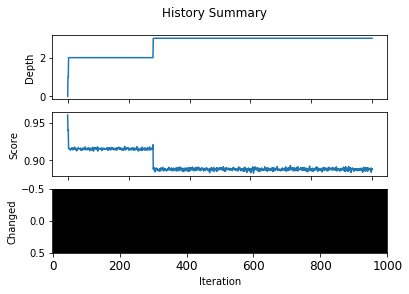

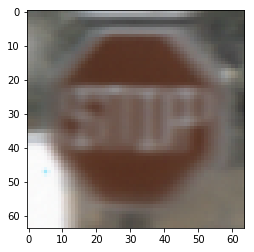

In [23]:
#Remote Degeneration
remoteAlternation2 = DegGen.chain([DegGen._normalize,DegGen._softNoise,DegGen._softNoise,DegGen._softSmooth,DegGen._softNoise,DegGen._softNoise])

remoteAns2 = DegGen.remoteDegenerate(remoteImg, remoteAlternation2,verbose=True, iterations=25, maxloops=600,decay=0.02)
plt.imshow(remoteAns2[1])

StartConfidence: 0.97586221
Score: 0.97945821 Depth: 0 Loop: 1
Score: 0.97924888 Depth: 1 Loop: 2
Score: 0.97930831 Depth: 2 Loop: 3
Score: 0.97944778 Depth: 3 Loop: 4
Score: 0.98104811 Depth: 4 Loop: 5
Score: 0.98247349 Depth: 5 Loop: 6
Score: 0.98266476 Depth: 6 Loop: 7
Score: 0.98323292 Depth: 7 Loop: 8
Score: 0.98352987 Depth: 8 Loop: 9
Score: 0.98211426 Depth: 9 Loop: 10
Score: 0.98134768 Depth: 10 Loop: 11
Score: 0.9809863 Depth: 11 Loop: 12
Score: 0.97919089 Depth: 12 Loop: 13
Score: 0.97969282 Depth: 13 Loop: 14
Score: 0.98046333 Depth: 14 Loop: 15
Score: 0.97968948 Depth: 15 Loop: 16
Score: 0.97971207 Depth: 16 Loop: 17
Score: 0.98032391 Depth: 17 Loop: 18
Score: 0.98012596 Depth: 18 Loop: 19
Score: 0.97977763 Depth: 19 Loop: 20
Score: 0.98048395 Depth: 20 Loop: 21
Score: 0.97998488 Depth: 21 Loop: 22
Score: 0.98010182 Depth: 22 Loop: 23
Score: 0.97946155 Depth: 23 Loop: 24
Score: 0.98010468 Depth: 24 Loop: 25
Score: 0.97936773 Depth: 25 Loop: 26
Score: 0.9798252 Depth: 26 Loo

Score: 0.97834218 Depth: 216 Loop: 217
Score: 0.97801811 Depth: 217 Loop: 218
Score: 0.9778741 Depth: 218 Loop: 219
Score: 0.97815198 Depth: 219 Loop: 220
Score: 0.97865444 Depth: 220 Loop: 221
Score: 0.97822136 Depth: 221 Loop: 222
Score: 0.97793716 Depth: 222 Loop: 223
Score: 0.97777712 Depth: 223 Loop: 224
Score: 0.97671014 Depth: 224 Loop: 225
Score: 0.97673929 Depth: 225 Loop: 226
Score: 0.97651219 Depth: 226 Loop: 227
Score: 0.97687483 Depth: 227 Loop: 228
Score: 0.97725528 Depth: 228 Loop: 229
Score: 0.97800702 Depth: 229 Loop: 230
Score: 0.97803819 Depth: 230 Loop: 231
Score: 0.97841769 Depth: 231 Loop: 232
Score: 0.97837216 Depth: 232 Loop: 233
Score: 0.97829539 Depth: 233 Loop: 234
Score: 0.97855628 Depth: 234 Loop: 235
Score: 0.97805071 Depth: 235 Loop: 236
Score: 0.97746766 Depth: 236 Loop: 237
Score: 0.97748262 Depth: 237 Loop: 238
Score: 0.97730833 Depth: 238 Loop: 239
Score: 0.97747803 Depth: 239 Loop: 240
Score: 0.97737759 Depth: 240 Loop: 241
Score: 0.97697973 Depth: 2

Score: 0.97631127 Depth: 427 Loop: 428
Score: 0.9763332 Depth: 428 Loop: 429
Score: 0.97642356 Depth: 429 Loop: 430
Score: 0.97709185 Depth: 430 Loop: 431
Score: 0.97599423 Depth: 431 Loop: 432
Score: 0.9764266 Depth: 432 Loop: 433
Score: 0.97723216 Depth: 433 Loop: 434
Score: 0.97658086 Depth: 434 Loop: 435
Score: 0.97637284 Depth: 435 Loop: 436
Score: 0.97678775 Depth: 436 Loop: 437
Score: 0.97693127 Depth: 437 Loop: 438
Score: 0.97713125 Depth: 438 Loop: 439
Score: 0.9772045 Depth: 439 Loop: 440
Score: 0.97706884 Depth: 440 Loop: 441
Score: 0.97657597 Depth: 441 Loop: 442
Score: 0.97643512 Depth: 442 Loop: 443
Score: 0.97683859 Depth: 443 Loop: 444
Score: 0.9762522 Depth: 444 Loop: 445
Score: 0.97646344 Depth: 445 Loop: 446
Score: 0.97695667 Depth: 446 Loop: 447
Score: 0.97709709 Depth: 447 Loop: 448
Score: 0.97635913 Depth: 448 Loop: 449
Score: 0.97664624 Depth: 449 Loop: 450
Score: 0.97686505 Depth: 450 Loop: 451
Score: 0.97713268 Depth: 451 Loop: 452
Score: 0.97773588 Depth: 452 

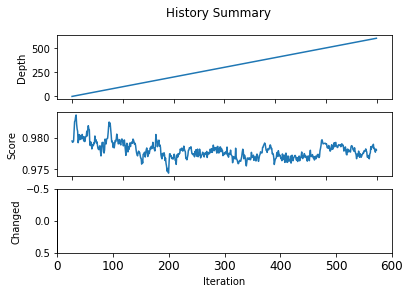

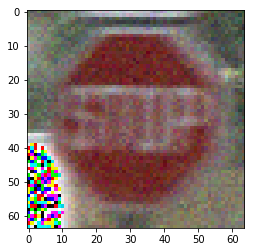

In [25]:
#Remote Degeneration
remoteAlternation3 = DegGen.chain([DegGen._normalize,DegGen._softNoise])

remoteAns3 = DegGen.remoteDegenerate(remoteImg, remoteAlternation3,verbose=True, iterations=3000, maxloops=600,decay=0.01)
plt.imshow(remoteAns3[1])

StartConfidence: 0.97586221
Score: 0.9816379 Depth: 0 Loop: 1
Score: 0.98344719 Depth: 1 Loop: 2
Score: 0.9827137 Depth: 2 Loop: 3
Score: 0.98225951 Depth: 3 Loop: 4
Score: 0.98319763 Depth: 4 Loop: 5
Score: 0.9816218 Depth: 5 Loop: 6
Score: 0.98072606 Depth: 6 Loop: 7
Score: 0.98020691 Depth: 7 Loop: 8
Score: 0.98034751 Depth: 8 Loop: 9
Score: 0.97989547 Depth: 9 Loop: 10
Score: 0.98160696 Depth: 10 Loop: 11
Score: 0.98189247 Depth: 11 Loop: 12
Score: 0.98026329 Depth: 12 Loop: 13
Score: 0.98039776 Depth: 13 Loop: 14
Score: 0.97977942 Depth: 14 Loop: 15
Score: 0.97810364 Depth: 15 Loop: 16
Score: 0.97666794 Depth: 16 Loop: 17
Score: 0.97806579 Depth: 17 Loop: 18
Score: 0.97789395 Depth: 18 Loop: 19
Score: 0.97879511 Depth: 19 Loop: 20
Score: 0.9793545 Depth: 20 Loop: 21
Score: 0.97822177 Depth: 21 Loop: 22
Score: 0.97856289 Depth: 22 Loop: 23
Score: 0.97953999 Depth: 23 Loop: 24
Score: 0.97712266 Depth: 24 Loop: 25
Score: 0.97683686 Depth: 25 Loop: 26
Score: 0.97703815 Depth: 26 Loop:

Score: 0.96587855 Depth: 216 Loop: 217
Score: 0.96494597 Depth: 217 Loop: 218
Score: 0.96754062 Depth: 218 Loop: 219
Score: 0.96743941 Depth: 219 Loop: 220
Score: 0.96527952 Depth: 220 Loop: 221
Score: 0.96341425 Depth: 221 Loop: 222
Score: 0.9621489 Depth: 222 Loop: 223
Score: 0.96360409 Depth: 223 Loop: 224
Score: 0.96590012 Depth: 224 Loop: 225
Score: 0.96435434 Depth: 225 Loop: 226
Score: 0.96444207 Depth: 226 Loop: 227
Score: 0.9648093 Depth: 227 Loop: 228
Score: 0.96439779 Depth: 228 Loop: 229
Score: 0.96288025 Depth: 229 Loop: 230
Score: 0.96471214 Depth: 230 Loop: 231
Score: 0.96733844 Depth: 231 Loop: 232
Score: 0.96860772 Depth: 232 Loop: 233
Score: 0.96659589 Depth: 233 Loop: 234
Score: 0.96601439 Depth: 234 Loop: 235
Score: 0.96372819 Depth: 235 Loop: 236
Score: 0.95707363 Depth: 236 Loop: 237
Score: 0.96201015 Depth: 236 Loop: 238
Score: 0.95413595 Depth: 237 Loop: 239
Score: 0.96233135 Depth: 237 Loop: 240
Score: 0.96489203 Depth: 238 Loop: 241
Score: 0.96729696 Depth: 23

Score: 0.94911557 Depth: 388 Loop: 428
Score: 0.94752687 Depth: 389 Loop: 429
Score: 0.94670361 Depth: 390 Loop: 430
Score: 0.94268131 Depth: 391 Loop: 431
Score: 0.94100374 Depth: 392 Loop: 432
Score: 0.9377237 Depth: 393 Loop: 433
Score: 0.93983233 Depth: 394 Loop: 434
Score: 0.93611491 Depth: 395 Loop: 435
Score: 0.93681669 Depth: 396 Loop: 436
Score: 0.93318105 Depth: 397 Loop: 437
Score: 0.92645067 Depth: 398 Loop: 438
Score: 0.93389064 Depth: 398 Loop: 439
Score: 0.9319346 Depth: 399 Loop: 440
Score: 0.94075626 Depth: 400 Loop: 441
Score: 0.93560642 Depth: 401 Loop: 442
Score: 0.93275559 Depth: 401 Loop: 443
Score: 0.9397434 Depth: 401 Loop: 444
Score: 0.93240738 Depth: 402 Loop: 445
Score: 0.92263222 Depth: 402 Loop: 446
Score: 0.93144161 Depth: 402 Loop: 447
Score: 0.93916327 Depth: 402 Loop: 448
Score: 0.92717946 Depth: 403 Loop: 449
Score: 0.93559027 Depth: 403 Loop: 450
Score: 0.91739857 Depth: 404 Loop: 451
Score: 0.93316662 Depth: 404 Loop: 452
Score: 0.93423843 Depth: 405

Score: 0.89247328 Depth: 527 Loop: 639
Score: 0.88636971 Depth: 527 Loop: 640
Score: 0.89656824 Depth: 527 Loop: 641
Score: 0.89182591 Depth: 527 Loop: 642
Score: 0.90617353 Depth: 527 Loop: 643
Score: 0.91534513 Depth: 528 Loop: 644
Score: 0.89749056 Depth: 529 Loop: 645
Score: 0.91868395 Depth: 529 Loop: 646
Score: 0.91143775 Depth: 530 Loop: 647
Score: 0.89025939 Depth: 530 Loop: 648
Score: 0.91368759 Depth: 530 Loop: 649
Score: 0.91574663 Depth: 531 Loop: 650
Score: 0.91086257 Depth: 532 Loop: 651
Score: 0.92774582 Depth: 533 Loop: 652
Score: 0.90568417 Depth: 534 Loop: 653
Score: 0.9259066 Depth: 534 Loop: 654
Score: 0.92142224 Depth: 535 Loop: 655
Score: 0.92300814 Depth: 536 Loop: 656
Score: 0.92559201 Depth: 537 Loop: 657
Score: 0.92864364 Depth: 538 Loop: 658
Score: 0.92782772 Depth: 539 Loop: 659
Score: 0.92282659 Depth: 540 Loop: 660
Score: 0.92620271 Depth: 540 Loop: 661
Score: 0.91186744 Depth: 541 Loop: 662
Score: 0.92522734 Depth: 541 Loop: 663
Score: 0.91618747 Depth: 5

Score: 0.91182446 Depth: 643 Loop: 850
Score: 0.91725332 Depth: 643 Loop: 851
Score: 0.91982931 Depth: 643 Loop: 852
Score: 0.92611337 Depth: 643 Loop: 853
Score: 0.92183983 Depth: 644 Loop: 854
Score: 0.9157508 Depth: 645 Loop: 855
Score: 0.92085838 Depth: 645 Loop: 856
Score: 0.91723377 Depth: 646 Loop: 857
Score: 0.91745967 Depth: 647 Loop: 858
Score: 0.90943682 Depth: 648 Loop: 859
Score: 0.91007674 Depth: 648 Loop: 860
Score: 0.91946101 Depth: 648 Loop: 861
Score: 0.90263569 Depth: 649 Loop: 862
Score: 0.91385752 Depth: 649 Loop: 863
Score: 0.91217494 Depth: 649 Loop: 864
Score: 0.89150679 Depth: 649 Loop: 865
Score: 0.90800244 Depth: 649 Loop: 866
Score: 0.90297586 Depth: 649 Loop: 867
Score: 0.90846258 Depth: 649 Loop: 868
Score: 0.88256693 Depth: 649 Loop: 869
Score: 0.91140419 Depth: 649 Loop: 870
Score: 0.92221886 Depth: 649 Loop: 871
Score: 0.9091152 Depth: 650 Loop: 872
Score: 0.91509658 Depth: 650 Loop: 873
Score: 0.89924461 Depth: 650 Loop: 874
Score: 0.89377135 Depth: 65

Score: 0.92248154 Depth: 700 Loop: 1059
Score: 0.91138649 Depth: 701 Loop: 1060
Score: 0.92432958 Depth: 701 Loop: 1061
Score: 0.93295574 Depth: 702 Loop: 1062
Score: 0.92473429 Depth: 703 Loop: 1063
Score: 0.93837017 Depth: 703 Loop: 1064
Score: 0.92754221 Depth: 704 Loop: 1065
Score: 0.9259873 Depth: 704 Loop: 1066
Score: 0.9292028 Depth: 704 Loop: 1067
Score: 0.94051528 Depth: 704 Loop: 1068
Score: 0.93424892 Depth: 705 Loop: 1069
Score: 0.93426579 Depth: 705 Loop: 1070
Score: 0.936396 Depth: 705 Loop: 1071
Score: 0.93011904 Depth: 706 Loop: 1072
Score: 0.92654383 Depth: 706 Loop: 1073
Score: 0.92614055 Depth: 706 Loop: 1074
Score: 0.9356966 Depth: 706 Loop: 1075
Score: 0.93339223 Depth: 707 Loop: 1076
Score: 0.91724998 Depth: 708 Loop: 1077
Score: 0.92637956 Depth: 708 Loop: 1078
Score: 0.935377 Depth: 708 Loop: 1079
Score: 0.93274575 Depth: 709 Loop: 1080
Score: 0.91729069 Depth: 710 Loop: 1081
Score: 0.93351918 Depth: 710 Loop: 1082
Score: 0.92638123 Depth: 711 Loop: 1083
Score: 

Score: 0.92101091 Depth: 788 Loop: 1265
Score: 0.90048766 Depth: 788 Loop: 1266
Score: 0.9171223 Depth: 788 Loop: 1267
Score: 0.91053116 Depth: 788 Loop: 1268
Score: 0.90630621 Depth: 788 Loop: 1269
Score: 0.9239862 Depth: 788 Loop: 1270
Score: 0.92529541 Depth: 789 Loop: 1271
Score: 0.92006904 Depth: 790 Loop: 1272
Score: 0.90950793 Depth: 790 Loop: 1273
Score: 0.92176276 Depth: 790 Loop: 1274
Score: 0.9114446 Depth: 791 Loop: 1275
Score: 0.91369677 Depth: 791 Loop: 1276
Score: 0.92729855 Depth: 791 Loop: 1277
Score: 0.91403985 Depth: 792 Loop: 1278
Score: 0.90378678 Depth: 792 Loop: 1279
Score: 0.90156925 Depth: 792 Loop: 1280
Score: 0.92170775 Depth: 792 Loop: 1281
Score: 0.90488726 Depth: 792 Loop: 1282
Score: 0.92354578 Depth: 792 Loop: 1283
Score: 0.91709435 Depth: 793 Loop: 1284
Score: 0.90708333 Depth: 793 Loop: 1285
Score: 0.91277742 Depth: 793 Loop: 1286
Score: 0.90223885 Depth: 793 Loop: 1287
Score: 0.90008098 Depth: 793 Loop: 1288
Score: 0.91658413 Depth: 793 Loop: 1289
Sco

Score: 0.9393754 Depth: 878 Loop: 1471
Score: 0.93471593 Depth: 878 Loop: 1472
Score: 0.92770171 Depth: 878 Loop: 1473
Score: 0.94006371 Depth: 878 Loop: 1474
Score: 0.94037229 Depth: 878 Loop: 1475
Score: 0.9423269 Depth: 878 Loop: 1476
Score: 0.93841761 Depth: 879 Loop: 1477
Score: 0.93019271 Depth: 880 Loop: 1478
Score: 0.9427166 Depth: 880 Loop: 1479
Score: 0.93494576 Depth: 881 Loop: 1480
Score: 0.94216442 Depth: 881 Loop: 1481
Score: 0.93737352 Depth: 882 Loop: 1482
Score: 0.93757153 Depth: 883 Loop: 1483
Score: 0.94205642 Depth: 884 Loop: 1484
Score: 0.93839443 Depth: 885 Loop: 1485
Score: 0.94396871 Depth: 886 Loop: 1486
Score: 0.93770838 Depth: 887 Loop: 1487
Score: 0.93632025 Depth: 887 Loop: 1488
Score: 0.93812704 Depth: 887 Loop: 1489
Score: 0.9387728 Depth: 887 Loop: 1490
Score: 0.94253653 Depth: 887 Loop: 1491
Score: 0.94603312 Depth: 888 Loop: 1492
Score: 0.94219702 Depth: 889 Loop: 1493
Score: 0.93409401 Depth: 890 Loop: 1494
Score: 0.9356848 Depth: 890 Loop: 1495
Score

Score: 0.93349838 Depth: 948 Loop: 1677
Score: 0.92675561 Depth: 949 Loop: 1678
Score: 0.93216956 Depth: 949 Loop: 1679
Score: 0.91506881 Depth: 950 Loop: 1680
Score: 0.89866394 Depth: 950 Loop: 1681
Score: 0.89903104 Depth: 950 Loop: 1682
Score: 0.92254138 Depth: 950 Loop: 1683
Score: 0.90834099 Depth: 950 Loop: 1684
Score: 0.91272461 Depth: 950 Loop: 1685
Score: 0.92510623 Depth: 950 Loop: 1686
Score: 0.92394972 Depth: 950 Loop: 1687
Score: 0.90961993 Depth: 950 Loop: 1688
Score: 0.92789161 Depth: 950 Loop: 1689
Score: 0.91563958 Depth: 951 Loop: 1690
Score: 0.8614766 Depth: 951 Loop: 1691
Score: 0.91981125 Depth: 951 Loop: 1692
Score: 0.91163874 Depth: 951 Loop: 1693
Score: 0.88330609 Depth: 951 Loop: 1694
Score: 0.92574197 Depth: 951 Loop: 1695
Score: 0.895899 Depth: 952 Loop: 1696
Score: 0.91787165 Depth: 952 Loop: 1697
Score: 0.92047459 Depth: 952 Loop: 1698
Score: 0.918302 Depth: 952 Loop: 1699
Score: 0.90228122 Depth: 952 Loop: 1700
Score: 0.91334361 Depth: 952 Loop: 1701
Score

Score: 0.91493082 Depth: 1018 Loop: 1882
Score: 0.92852032 Depth: 1018 Loop: 1883
Score: 0.92194772 Depth: 1019 Loop: 1884
Score: 0.92365044 Depth: 1019 Loop: 1885
Score: 0.93156195 Depth: 1020 Loop: 1886
Score: 0.92817307 Depth: 1021 Loop: 1887
Score: 0.89740318 Depth: 1022 Loop: 1888
Score: 0.92082328 Depth: 1022 Loop: 1889
Score: 0.9171446 Depth: 1022 Loop: 1890
Score: 0.91378903 Depth: 1022 Loop: 1891
Score: 0.90461522 Depth: 1022 Loop: 1892
Score: 0.91410118 Depth: 1022 Loop: 1893
Score: 0.9166469 Depth: 1022 Loop: 1894
Score: 0.91650701 Depth: 1022 Loop: 1895
Score: 0.93418485 Depth: 1022 Loop: 1896
Score: 0.92008007 Depth: 1023 Loop: 1897
Score: 0.9253276 Depth: 1023 Loop: 1898
Score: 0.90357608 Depth: 1023 Loop: 1899
Score: 0.92303228 Depth: 1023 Loop: 1900
Score: 0.92917413 Depth: 1023 Loop: 1901
Score: 0.92820448 Depth: 1023 Loop: 1902
Score: 0.91472787 Depth: 1023 Loop: 1903
Score: 0.91805476 Depth: 1023 Loop: 1904
Score: 0.91753811 Depth: 1023 Loop: 1905
Score: 0.92713511 D

Score: 0.91226166 Depth: 1091 Loop: 2083
Score: 0.90433913 Depth: 1091 Loop: 2084
Score: 0.91313523 Depth: 1091 Loop: 2085
Score: 0.92182827 Depth: 1091 Loop: 2086
Score: 0.90397656 Depth: 1091 Loop: 2087
Score: 0.90613246 Depth: 1091 Loop: 2088
Score: 0.91325539 Depth: 1091 Loop: 2089
Score: 0.91653645 Depth: 1091 Loop: 2090
Score: 0.91611236 Depth: 1091 Loop: 2091
Score: 0.92655832 Depth: 1091 Loop: 2092
Score: 0.91046989 Depth: 1092 Loop: 2093
Score: 0.91515779 Depth: 1092 Loop: 2094
Score: 0.90988564 Depth: 1092 Loop: 2095
Score: 0.91341591 Depth: 1092 Loop: 2096
Score: 0.92781866 Depth: 1092 Loop: 2097
Score: 0.91836154 Depth: 1093 Loop: 2098
Score: 0.91580552 Depth: 1093 Loop: 2099
Score: 0.92707473 Depth: 1093 Loop: 2100
Score: 0.90624237 Depth: 1094 Loop: 2101
Score: 0.90945703 Depth: 1094 Loop: 2102
Score: 0.9239527 Depth: 1094 Loop: 2103
Score: 0.91661948 Depth: 1095 Loop: 2104
Score: 0.91208249 Depth: 1095 Loop: 2105
Score: 0.92308086 Depth: 1095 Loop: 2106
Score: 0.90631592

Score: 0.91318601 Depth: 1160 Loop: 2284
Score: 0.90585905 Depth: 1160 Loop: 2285
Score: 0.91788 Depth: 1160 Loop: 2286
Score: 0.91982025 Depth: 1160 Loop: 2287
Score: 0.90879929 Depth: 1161 Loop: 2288
Score: 0.92120969 Depth: 1161 Loop: 2289
Score: 0.92891556 Depth: 1162 Loop: 2290
Score: 0.91901773 Depth: 1163 Loop: 2291
Score: 0.91445446 Depth: 1163 Loop: 2292
Score: 0.9232136 Depth: 1163 Loop: 2293
Score: 0.91542995 Depth: 1163 Loop: 2294
Score: 0.92185491 Depth: 1163 Loop: 2295
Score: 0.90820569 Depth: 1163 Loop: 2296
Score: 0.92518467 Depth: 1163 Loop: 2297
Score: 0.9193396 Depth: 1164 Loop: 2298
Score: 0.9116776 Depth: 1164 Loop: 2299
Score: 0.89707392 Depth: 1164 Loop: 2300
Score: 0.92272681 Depth: 1164 Loop: 2301
Score: 0.92668319 Depth: 1165 Loop: 2302
Score: 0.91410381 Depth: 1166 Loop: 2303
Score: 0.91573262 Depth: 1166 Loop: 2304
Score: 0.90755439 Depth: 1166 Loop: 2305
Score: 0.91723043 Depth: 1166 Loop: 2306
Score: 0.92420554 Depth: 1166 Loop: 2307
Score: 0.90710717 Dept

Score: 0.93728209 Depth: 1223 Loop: 2485
Score: 0.92774898 Depth: 1224 Loop: 2486
Score: 0.91411138 Depth: 1224 Loop: 2487
Score: 0.93092549 Depth: 1224 Loop: 2488
Score: 0.92533046 Depth: 1224 Loop: 2489
Score: 0.90993834 Depth: 1224 Loop: 2490
Score: 0.93084556 Depth: 1224 Loop: 2491
Score: 0.9334985 Depth: 1224 Loop: 2492
Score: 0.93496555 Depth: 1225 Loop: 2493
Score: 0.93533134 Depth: 1226 Loop: 2494
Score: 0.92250448 Depth: 1227 Loop: 2495
Score: 0.93937266 Depth: 1227 Loop: 2496
Score: 0.93351012 Depth: 1228 Loop: 2497
Score: 0.92840666 Depth: 1228 Loop: 2498
Score: 0.93351388 Depth: 1228 Loop: 2499
Score: 0.9337036 Depth: 1228 Loop: 2500
Score: 0.93663293 Depth: 1228 Loop: 2501
Score: 0.92050862 Depth: 1229 Loop: 2502
Score: 0.91904038 Depth: 1229 Loop: 2503
Score: 0.94360828 Depth: 1229 Loop: 2504
Score: 0.93585759 Depth: 1230 Loop: 2505
Score: 0.9290362 Depth: 1230 Loop: 2506
Score: 0.94012535 Depth: 1230 Loop: 2507
Score: 0.93393213 Depth: 1231 Loop: 2508
Score: 0.93094873 D

Score: 0.93605095 Depth: 1281 Loop: 2686
Score: 0.94663018 Depth: 1281 Loop: 2687
Score: 0.9424783 Depth: 1282 Loop: 2688
Score: 0.92052984 Depth: 1283 Loop: 2689
Score: 0.94284523 Depth: 1283 Loop: 2690
Score: 0.93906778 Depth: 1284 Loop: 2691
Score: 0.92426264 Depth: 1285 Loop: 2692
Score: 0.91668755 Depth: 1285 Loop: 2693
Score: 0.94177938 Depth: 1285 Loop: 2694
Score: 0.90916359 Depth: 1286 Loop: 2695
Score: 0.92719781 Depth: 1286 Loop: 2696
Score: 0.9420259 Depth: 1286 Loop: 2697
Score: 0.9365086 Depth: 1287 Loop: 2698
Score: 0.94061917 Depth: 1287 Loop: 2699
Score: 0.94435436 Depth: 1288 Loop: 2700
Score: 0.94098788 Depth: 1289 Loop: 2701
Score: 0.93753779 Depth: 1290 Loop: 2702
Score: 0.91054404 Depth: 1291 Loop: 2703
Score: 0.938775 Depth: 1291 Loop: 2704
Score: 0.92199892 Depth: 1292 Loop: 2705
Score: 0.93328053 Depth: 1292 Loop: 2706
Score: 0.92358553 Depth: 1292 Loop: 2707
Score: 0.93750501 Depth: 1292 Loop: 2708
Score: 0.93076187 Depth: 1293 Loop: 2709
Score: 0.92570138 Dep

Score: 0.89719242 Depth: 1345 Loop: 2887
Score: 0.91458219 Depth: 1345 Loop: 2888
Score: 0.92602259 Depth: 1345 Loop: 2889
Score: 0.91435838 Depth: 1346 Loop: 2890
Score: 0.92591119 Depth: 1346 Loop: 2891
Score: 0.92125821 Depth: 1347 Loop: 2892
Score: 0.91640729 Depth: 1348 Loop: 2893
Score: 0.89990437 Depth: 1349 Loop: 2894
Score: 0.91622549 Depth: 1349 Loop: 2895
Score: 0.89546895 Depth: 1350 Loop: 2896
Score: 0.91746467 Depth: 1350 Loop: 2897
Score: 0.8923645 Depth: 1351 Loop: 2898
Score: 0.89640027 Depth: 1351 Loop: 2899
Score: 0.87356281 Depth: 1351 Loop: 2900
Score: 0.91546059 Depth: 1351 Loop: 2901
Score: 0.91121638 Depth: 1352 Loop: 2902
Score: 0.85895723 Depth: 1353 Loop: 2903
Score: 0.89889956 Depth: 1353 Loop: 2904
Score: 0.89513421 Depth: 1353 Loop: 2905
Score: 0.91281736 Depth: 1353 Loop: 2906
Score: 0.89242017 Depth: 1354 Loop: 2907
Score: 0.88697708 Depth: 1354 Loop: 2908
Score: 0.88886261 Depth: 1354 Loop: 2909
Score: 0.9101671 Depth: 1354 Loop: 2910
Score: 0.91467249 

Score: 0.93585509 Depth: 1420 Loop: 3088
Score: 0.91693836 Depth: 1421 Loop: 3089
Score: 0.91870451 Depth: 1421 Loop: 3090
Score: 0.93455678 Depth: 1421 Loop: 3091
Score: 0.92180854 Depth: 1422 Loop: 3092
Score: 0.9255234 Depth: 1422 Loop: 3093
Score: 0.9228934 Depth: 1422 Loop: 3094
Score: 0.91867775 Depth: 1422 Loop: 3095
Score: 0.90869725 Depth: 1422 Loop: 3096
Score: 0.93194538 Depth: 1422 Loop: 3097
Score: 0.91702437 Depth: 1423 Loop: 3098
Score: 0.92530102 Depth: 1423 Loop: 3099
Score: 0.92303401 Depth: 1423 Loop: 3100
Score: 0.9152146 Depth: 1423 Loop: 3101
Score: 0.93723655 Depth: 1423 Loop: 3102
Score: 0.92715746 Depth: 1424 Loop: 3103
Score: 0.92495477 Depth: 1424 Loop: 3104
Score: 0.92178041 Depth: 1424 Loop: 3105
Score: 0.94068801 Depth: 1424 Loop: 3106
Score: 0.9139148 Depth: 1425 Loop: 3107
Score: 0.93359846 Depth: 1425 Loop: 3108
Score: 0.90716666 Depth: 1425 Loop: 3109
Score: 0.93585682 Depth: 1425 Loop: 3110
Score: 0.91116995 Depth: 1426 Loop: 3111
Score: 0.91419494 De

Score: 0.90945429 Depth: 1479 Loop: 3289
Score: 0.90129822 Depth: 1479 Loop: 3290
Score: 0.91375721 Depth: 1479 Loop: 3291
Score: 0.91549844 Depth: 1479 Loop: 3292
Score: 0.90418518 Depth: 1479 Loop: 3293
Score: 0.91301507 Depth: 1479 Loop: 3294
Score: 0.91815829 Depth: 1479 Loop: 3295
Score: 0.88323367 Depth: 1480 Loop: 3296
Score: 0.88597143 Depth: 1480 Loop: 3297
Score: 0.8965168 Depth: 1480 Loop: 3298
Score: 0.9016366 Depth: 1480 Loop: 3299
Score: 0.90019137 Depth: 1480 Loop: 3300
Score: 0.8919909 Depth: 1480 Loop: 3301
Score: 0.89505559 Depth: 1480 Loop: 3302
Score: 0.89453411 Depth: 1480 Loop: 3303
Score: 0.89743716 Depth: 1480 Loop: 3304
Score: 0.91055155 Depth: 1480 Loop: 3305
Score: 0.91084504 Depth: 1480 Loop: 3306
Score: 0.91432995 Depth: 1480 Loop: 3307
Score: 0.90537643 Depth: 1481 Loop: 3308
Score: 0.8999036 Depth: 1481 Loop: 3309
Score: 0.88237292 Depth: 1481 Loop: 3310
Score: 0.90111208 Depth: 1481 Loop: 3311
Score: 0.90108204 Depth: 1481 Loop: 3312
Score: 0.9105559 Dep

Score: 0.90413433 Depth: 1526 Loop: 3490
Score: 0.93567133 Depth: 1526 Loop: 3491
Score: 0.92185128 Depth: 1527 Loop: 3492
Score: 0.90838259 Depth: 1527 Loop: 3493
Score: 0.92950386 Depth: 1527 Loop: 3494
Score: 0.93246782 Depth: 1527 Loop: 3495
Score: 0.92182761 Depth: 1528 Loop: 3496
Score: 0.91678113 Depth: 1528 Loop: 3497
Score: 0.9287616 Depth: 1528 Loop: 3498
Score: 0.91038078 Depth: 1529 Loop: 3499
Score: 0.92149544 Depth: 1529 Loop: 3500
Score: 0.92184347 Depth: 1529 Loop: 3501
Score: 0.9062174 Depth: 1529 Loop: 3502
Score: 0.91580832 Depth: 1529 Loop: 3503
Score: 0.91821176 Depth: 1529 Loop: 3504
Score: 0.91344339 Depth: 1529 Loop: 3505
Score: 0.92975569 Depth: 1529 Loop: 3506
Score: 0.91523635 Depth: 1530 Loop: 3507
Score: 0.92641705 Depth: 1530 Loop: 3508
Score: 0.92403269 Depth: 1531 Loop: 3509
Score: 0.91660112 Depth: 1532 Loop: 3510
Score: 0.91299152 Depth: 1532 Loop: 3511
Score: 0.91351271 Depth: 1532 Loop: 3512
Score: 0.92355746 Depth: 1532 Loop: 3513
Score: 0.91408706 

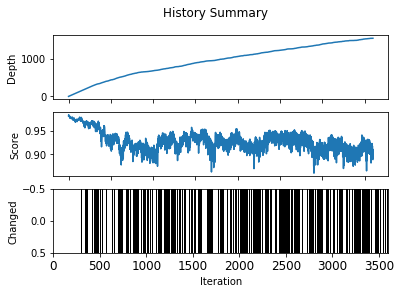

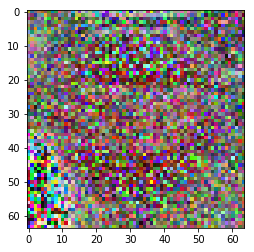

In [28]:
#Remote Degeneration
remoteAlternation4 = DegGen.chain([DegGen._normalize,DegGen._noise])

remoteAns4 = DegGen.remoteDegenerate(remoteImg, remoteAlternation4,verbose=True, iterations=4000, maxloops=3600,decay=0.005)
plt.imshow(remoteAns4[1])

StartConfidence: 0.97586221
Score: 0.96057487 Depth: 0 Loop: 1
Score: 0.96097517 Depth: 0 Loop: 2
Score: 0.96155339 Depth: 0 Loop: 3
Score: 0.95987648 Depth: 0 Loop: 4
Score: 0.96111798 Depth: 0 Loop: 5
Score: 0.96288955 Depth: 0 Loop: 6
Score: 0.96125269 Depth: 0 Loop: 7
Score: 0.96089947 Depth: 0 Loop: 8
Score: 0.96084344 Depth: 0 Loop: 9
Score: 0.96100128 Depth: 0 Loop: 10
Score: 0.96165854 Depth: 0 Loop: 11
Score: 0.96074343 Depth: 0 Loop: 12
Score: 0.95976257 Depth: 0 Loop: 13
Score: 0.96100581 Depth: 0 Loop: 14
Score: 0.96216261 Depth: 0 Loop: 15
Score: 0.96209389 Depth: 0 Loop: 16
Score: 0.96258557 Depth: 0 Loop: 17
Score: 0.95962477 Depth: 0 Loop: 18
Score: 0.961308 Depth: 0 Loop: 19
Score: 0.96120852 Depth: 0 Loop: 20
Score: 0.96131957 Depth: 0 Loop: 21
Score: 0.96146697 Depth: 0 Loop: 22
Score: 0.96183729 Depth: 0 Loop: 23
Score: 0.96066386 Depth: 0 Loop: 24
Score: 0.96202171 Depth: 0 Loop: 25
Score: 0.9606185 Depth: 0 Loop: 26
Score: 0.96143293 Depth: 0 Loop: 27
Score: 0.960

Score: 0.96183383 Depth: 0 Loop: 226
Score: 0.96233416 Depth: 0 Loop: 227
Score: 0.96088803 Depth: 0 Loop: 228
Score: 0.96098256 Depth: 0 Loop: 229
Score: 0.96090961 Depth: 0 Loop: 230
Score: 0.96013385 Depth: 0 Loop: 231
Score: 0.96214199 Depth: 0 Loop: 232
Score: 0.96147978 Depth: 0 Loop: 233
Score: 0.96200496 Depth: 0 Loop: 234
Score: 0.96107548 Depth: 0 Loop: 235
Score: 0.96122825 Depth: 0 Loop: 236
Score: 0.96013826 Depth: 0 Loop: 237
Score: 0.96198386 Depth: 0 Loop: 238
Score: 0.96137047 Depth: 0 Loop: 239
Score: 0.96045411 Depth: 0 Loop: 240
Score: 0.96068531 Depth: 0 Loop: 241
Score: 0.96130073 Depth: 0 Loop: 242
Score: 0.96000367 Depth: 0 Loop: 243
Score: 0.96158963 Depth: 0 Loop: 244
Score: 0.95967001 Depth: 0 Loop: 245
Score: 0.96121246 Depth: 0 Loop: 246
Score: 0.96095747 Depth: 0 Loop: 247
Score: 0.96223426 Depth: 0 Loop: 248
Score: 0.96112812 Depth: 0 Loop: 249
Score: 0.96119297 Depth: 0 Loop: 250
Score: 0.9615441 Depth: 0 Loop: 251
Score: 0.96240669 Depth: 0 Loop: 252
Sc

Score: 0.96158886 Depth: 0 Loop: 449
Score: 0.96126479 Depth: 0 Loop: 450
Score: 0.96148646 Depth: 0 Loop: 451
Score: 0.96114212 Depth: 0 Loop: 452
Score: 0.9617551 Depth: 0 Loop: 453
Score: 0.96208405 Depth: 0 Loop: 454
Score: 0.96139091 Depth: 0 Loop: 455
Score: 0.96005738 Depth: 0 Loop: 456
Score: 0.95877057 Depth: 0 Loop: 457
Score: 0.96086377 Depth: 0 Loop: 458
Score: 0.95971733 Depth: 0 Loop: 459
Score: 0.96007586 Depth: 0 Loop: 460
Score: 0.96151769 Depth: 0 Loop: 461
Score: 0.96179295 Depth: 0 Loop: 462
Score: 0.9615835 Depth: 0 Loop: 463
Score: 0.96090144 Depth: 0 Loop: 464
Score: 0.9612962 Depth: 0 Loop: 465
Score: 0.95991415 Depth: 0 Loop: 466
Score: 0.96120226 Depth: 0 Loop: 467
Score: 0.96175689 Depth: 0 Loop: 468
Score: 0.96117473 Depth: 0 Loop: 469
Score: 0.9616335 Depth: 0 Loop: 470
Score: 0.9614898 Depth: 0 Loop: 471
Score: 0.96247989 Depth: 0 Loop: 472
Score: 0.96123266 Depth: 0 Loop: 473
Score: 0.96053469 Depth: 0 Loop: 474
Score: 0.9603914 Depth: 0 Loop: 475
Score: 

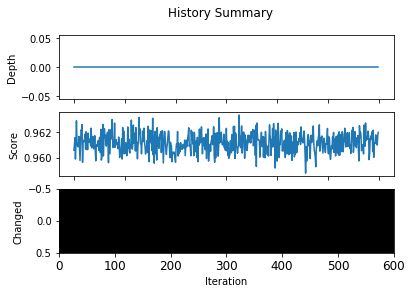

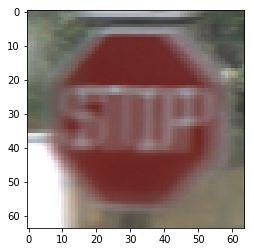

In [33]:
#Remote Degeneration
remoteAlternation5 = DegGen.chain([DegGen._normalize,DegGen._softSmooth,DegGen._noise])

remoteAns5 = DegGen.remoteDegenerate(remoteImg, remoteAlternation5,verbose=True, iterations=400, maxloops=600,decay=0.01)
plt.imshow(remoteAns5[1])